<a href="https://colab.research.google.com/github/23F24862/housepriceprediction-RIHAM-MPA/blob/main/23f24862_riham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 (ii) Step 1: Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Step 2: Load dataset
df = pd.read_csv("Housing.csv")

In [ ]:
df = pd.read_csv('Housing.csv')
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,12215000
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,11410000


In [ ]:
# Step 3: Encode categorical features for analysis
df_encoded = df.copy()
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                    'airconditioning', 'prefarea', 'furnishingstatus']
df_encoded[categorical_cols] = df_encoded[categorical_cols].apply(lambda col: pd.factorize(col)[0])

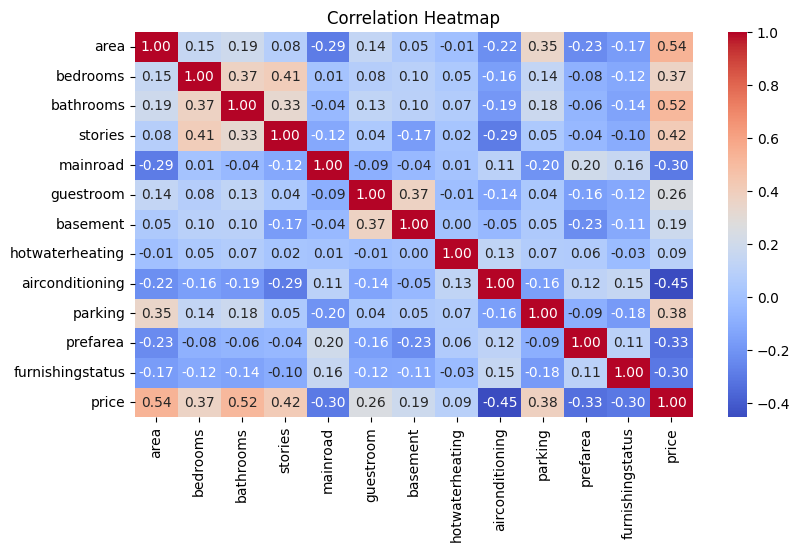

In [ ]:
# Step 4: Heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

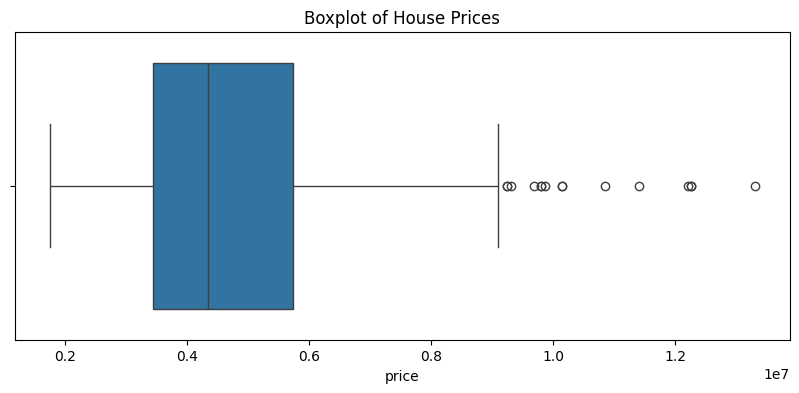

In [ ]:
# Step 5: Boxplot for outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.show()

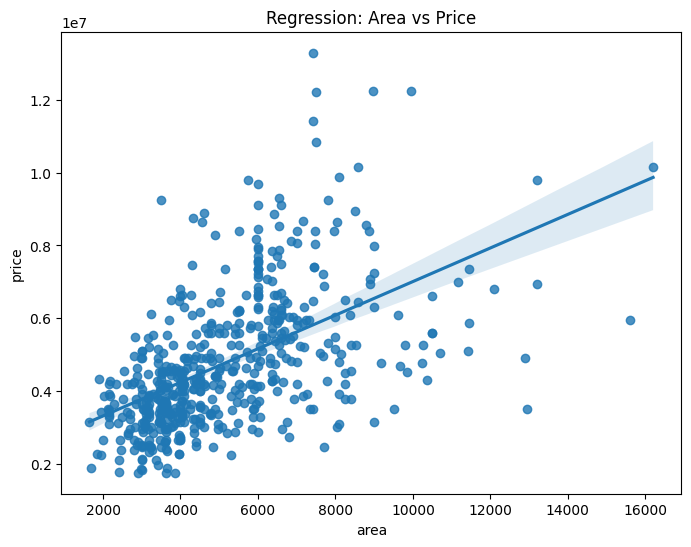

In [ ]:
# Step 6: Regression plot: Area vs Price
plt.figure(figsize=(8, 6))
sns.regplot(x='area', y='price', data=df)
plt.title("Regression: Area vs Price")
plt.show()

In [ ]:
# Step 7: Pearson Correlation
print("Pearson Correlation Coefficient & p-values:")
target = 'price'
for feature in df_encoded.columns.drop(target):
    corr, p = pearsonr(df_encoded[feature], df_encoded[target])
    print(f"{feature:20s} | Correlation: {corr:.3f} | p-value: {p:.5f}")

Pearson Correlation Coefficient & p-values:
area                 | Correlation: 0.536 | p-value: 0.00000
bedrooms             | Correlation: 0.366 | p-value: 0.00000
bathrooms            | Correlation: 0.518 | p-value: 0.00000
stories              | Correlation: 0.421 | p-value: 0.00000
mainroad             | Correlation: -0.297 | p-value: 0.00000
guestroom            | Correlation: 0.256 | p-value: 0.00000
basement             | Correlation: 0.187 | p-value: 0.00001
hotwaterheating      | Correlation: 0.093 | p-value: 0.02982
airconditioning      | Correlation: -0.453 | p-value: 0.00000
parking              | Correlation: 0.384 | p-value: 0.00000
prefarea             | Correlation: -0.330 | p-value: 0.00000
furnishingstatus     | Correlation: -0.305 | p-value: 0.00000


(iii) Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Step 1: Handle missing values (not necessary here as dataset is clean)
print(df.isnull().sum())

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [ ]:
# Step 2: Outlier Removal using IQR (for 'price')
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Step 3: Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# Step 4: Normalization
scaler = MinMaxScaler()
numerical = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df[numerical] = scaler.fit_transform(df[numerical])

In [ ]:
# Final cleaned and transformed data
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
15,0.311828,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,1,1.000000
16,0.354839,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,2,1.000000
17,0.491039,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0.980952
18,0.211470,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,0,0.971429
19,0.341935,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0.966667


 (iv) Regression Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Step 1: Features and Target
X = df.drop('price', axis=1)
y = df['price']

In [ ]:
# Step 2: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Model 1 - Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [ ]:
# Step 4: Model 2 - Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

(v) Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

In [ ]:
# Random Forest Evaluation
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Linear Regression:")
print(f"MSE: {lr_mse:.4f}, R2: {lr_r2:.4f}\n")

print("Random Forest Regressor:")
print(f"MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

# Best model based on higher R2
best_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
print(f"\nBest Model: {best_model}")

Linear Regression:
MSE: 0.0217, R2: 0.6609

Random Forest Regressor:
MSE: 0.0231, R2: 0.6397

Best Model: Linear Regression


In [ ]:
# Best model based on higher R2
best_model = "Random Forest" if rf_r2 > lr_r2 else "Linear Regression"
print(f"\nBest Model: {best_model}")


Best Model: Linear Regression


(vi) Basic Model Deployment UI (Optional Streamlit Interface)

In [ ]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

In [ ]:
# 2. Load your dataset
df = pd.read_csv("Housing.csv")

In [ ]:
# 3. Encode categorical (binary) columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [ ]:
# Encode 'furnishingstatus'
df['furnishingstatus'] = df['furnishingstatus'].map({
    'furnished': 0,
    'semi-furnished': 1,
    'unfurnished': 2
})

In [ ]:
# 4. Define features and target
X = df.drop("price", axis=1)
y = df["price"]

In [ ]:
# 5. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 6. Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
import joblib
joblib.dump(model, "rf_model.pkl")

['rf_model.pkl']

In [ ]:
from google.colab import files
files.download("rf_model.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>